In [110]:
# from google.colab import drive
# drive.mount('/content/drive')


In [111]:
## Pandas
import pandas as pd

## Numpy
import numpy as np

## Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score


## Set global scikit-learn configuration
from sklearn import set_config


## Warnings
import warnings

#Other Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

Use KMeans to create various customer segments.

Use an Elbow Plot of inertia.
And a plot of Silhouette Scores.

Choose a K based on the results.

Analyze the clusters you made in Part 1.  

Create analytical visualizations that explore statistics for each feature for each cluster.

Write a description of each cluster based on the visualizations you created.

Do more than describe the numbers; try to see beyond the numbers and describe the people represented by each cluster.

Include at least one insight for each cluster.

Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently or which cards they should market to each cluster based on your data and insights.

In [113]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

In [114]:
#Load Data
fpath = '/content/drive/MyDrive/CodingDojo/03-IntermediateMachineLearning/Week10/Data/cust_seg.csv'
df = pd.read_csv(fpath)
df.head()


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [115]:
## Display the number of rows and columns for the dataframe
df.shape

(850, 10)

In [116]:
df.dtypes

Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [117]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [118]:
df = df.drop('Unnamed: 0', axis=1)

Scale Data

In [119]:
# define the columns you want to use (X is fine, but remember there isn't an X and y)
X_scaled = df[['Years Employed', 'Income', 'Age']]
X_scaled.head()

,Years Employed,Income,Age
0,6,19,41
1,26,100,47
2,10,57,33
3,4,19,29
4,31,253,47


In [120]:
# scale the data using standard scaler
X_scaled = StandardScaler().fit_transform(X)


In [121]:
df.describe()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


Text(0.5, 1.0, 'KMeans Inertias')

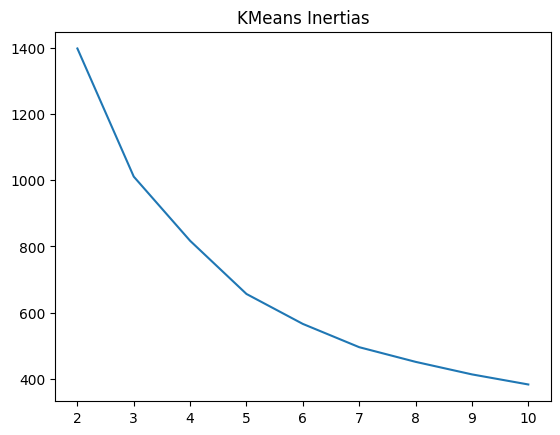

In [122]:
## Create an empty list of inertias
inertias = []
sils= []
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sils.append(sil_score)

## Loop through k values between 2 and 10
## and store the scores in the list
plt.plot(ks, inertias)
plt.title('KMeans Inertias')
## Visualize the scores

Text(0.5, 1.0, 'Silhouette Scores')

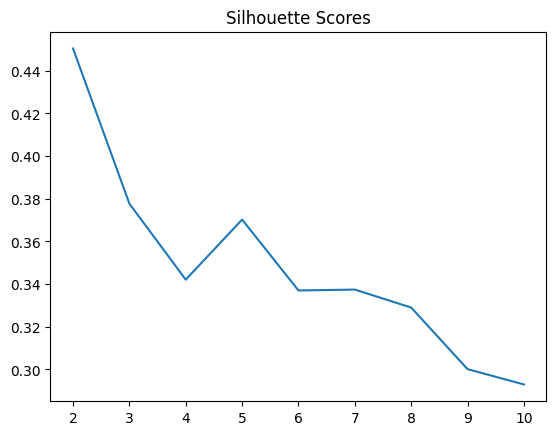

In [123]:
## Create an empty list for silhouette scores
sils = []

## Loop through k values between 2 and 10
## and store the scores in the list
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sils.append(sil_score)
## Visualize the scores
plt.plot(ks, sils)
plt.title('Silhouette Scores')

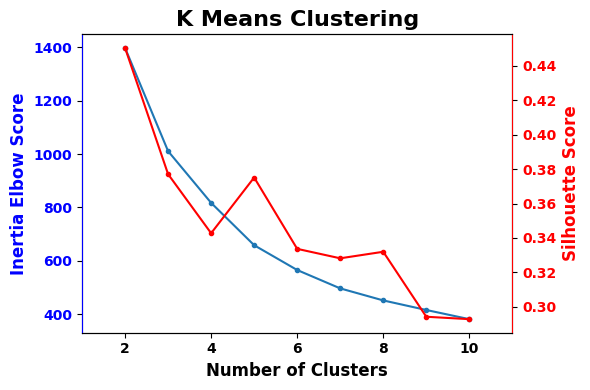

In [124]:
## Create empty lists for scores
inertias = []
silhouette_scores = []

## Loop through k values between 2 and 10
## and store the scores in the list
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

## Visualize the scores
fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('K Means Clustering', fontsize = 16, weight='bold')

ax1.plot(range(2, 11), inertias, marker = '.')
ax1.set_ylabel('Inertia Elbow Score', color='blue', fontsize = 12, weight='bold')
plt.xlabel('Number of Clusters', fontsize = 12, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_ticks(np.arange(0, 12, 2))

plt.xlim([1, 11])

ax2 = ax1.twinx()
ax2.plot(range(2, 11), silhouette_scores, color='r', marker = '.')
ax2.set_ylabel('Silhouette Score', color='r', fontsize = 12, weight='bold', )
plt.yticks(fontsize = 10, weight='bold');
ax2.tick_params(axis='y', labelcolor='r')
ax2.spines['right'].set_color('r')

ax2.spines['left'].set_color('blue');
ax2.spines['right'].set_color('r');

plt.tight_layout()
plt.show;

In [125]:
# instantiate a KMeans model with the value for k based on elbow plot method
# and silhouette score
kmeans = KMeans(n_clusters=5).fit(X_scaled)

In [126]:
kmeans.labels_

array([4, 0, 2, 1, 3, 0, 4, 4, 1, 0, 4, 2, 1, 4, 1, 1, 1, 4, 0, 2, 1, 2,
       1, 0, 0, 4, 1, 2, 2, 2, 0, 2, 1, 4, 2, 1, 4, 4, 1, 0, 1, 0, 1, 3,
       4, 4, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 4, 4, 2, 2, 2, 0, 1, 2,
       2, 1, 4, 1, 2, 4, 2, 1, 1, 1, 4, 1, 0, 0, 2, 1, 0, 4, 4, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 4, 4, 2, 1, 1, 1, 0, 2, 4, 1, 0, 4, 1, 2, 0,
       2, 1, 2, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 2, 2, 4, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 4, 4, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 2, 4, 4, 4,
       2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 4, 0, 1, 2, 1, 2, 4,
       2, 1, 1, 0, 4, 2, 1, 0, 4, 1, 4, 2, 2, 4, 1, 4, 2, 4, 0, 1, 1, 0,
       3, 4, 0, 4, 1, 4, 4, 4, 2, 3, 0, 1, 2, 2, 2, 0, 4, 1, 4, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 4, 0, 4, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 4, 3, 4, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 4, 1, 2, 1,
       0, 4, 2, 2, 4, 4, 1, 1, 2, 2, 4, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 1,
       2, 1, 0, 0, 1, 4, 1, 2, 1, 1, 1, 1, 1, 0, 2,

In [127]:
# add a column to the dataframe to add the cluster label as you fit and predict x
df_analysis = df.copy()
df_analysis['cluster'] = kmeans.labels_
df_analysis.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,4
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3


Cluster Statistics

In [128]:
df_groups = df_analysis.groupby('cluster')
cluster_means = df_groups.mean()
cluster_means

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,410.649573,44.658120,1.769231,19.145299,90.307692,3.050342,6.274615,0.117021,10.454701
1,426.387574,27.627219,1.748521,3.411243,26.840237,0.943015,1.897837,0.369718,10.426923
2,433.909524,34.538095,1.547619,12.371429,46.866667,1.665357,2.912548,0.127168,9.536667
3,421.625000,45.375000,2.687500,19.687500,235.812500,6.113625,11.619312,0.333333,7.650000
4,423.923077,42.798817,1.704142,5.769231,37.994083,1.284763,2.626118,0.299270,10.492899


In [129]:
kmeans.predict(X_scaled)

array([4, 0, 2, 1, 3, 0, 4, 4, 1, 0, 4, 2, 1, 4, 1, 1, 1, 4, 0, 2, 1, 2,
       1, 0, 0, 4, 1, 2, 2, 2, 0, 2, 1, 4, 2, 1, 4, 4, 1, 0, 1, 0, 1, 3,
       4, 4, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 4, 4, 2, 2, 2, 0, 1, 2,
       2, 1, 4, 1, 2, 4, 2, 1, 1, 1, 4, 1, 0, 0, 2, 1, 0, 4, 4, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 4, 4, 2, 1, 1, 1, 0, 2, 4, 1, 0, 4, 1, 2, 0,
       2, 1, 2, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 2, 2, 4, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 4, 4, 2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 2, 4, 4, 4,
       2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 4, 0, 1, 2, 1, 2, 4,
       2, 1, 1, 0, 4, 2, 1, 0, 4, 1, 4, 2, 2, 4, 1, 4, 2, 4, 0, 1, 1, 0,
       3, 4, 0, 4, 1, 4, 4, 4, 2, 3, 0, 1, 2, 2, 2, 0, 4, 1, 4, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 4, 0, 4, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 4, 3, 4, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 4, 1, 2, 1,
       0, 4, 2, 2, 4, 4, 1, 1, 2, 2, 4, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 1,
       2, 1, 0, 0, 1, 4, 1, 2, 1, 1, 1, 1, 1, 0, 2,

array([<Axes: title={'center': 'Customer Id'}, xlabel='cluster'>,
       <Axes: title={'center': 'Age'}, xlabel='cluster'>,
       <Axes: title={'center': 'Edu'}, xlabel='cluster'>,
       <Axes: title={'center': 'Years Employed'}, xlabel='cluster'>,
       <Axes: title={'center': 'Income'}, xlabel='cluster'>,
       <Axes: title={'center': 'Card Debt'}, xlabel='cluster'>,
       <Axes: title={'center': 'Other Debt'}, xlabel='cluster'>,
       <Axes: title={'center': 'Defaulted'}, xlabel='cluster'>,
       <Axes: title={'center': 'DebtIncomeRatio'}, xlabel='cluster'>],
      dtype=object)

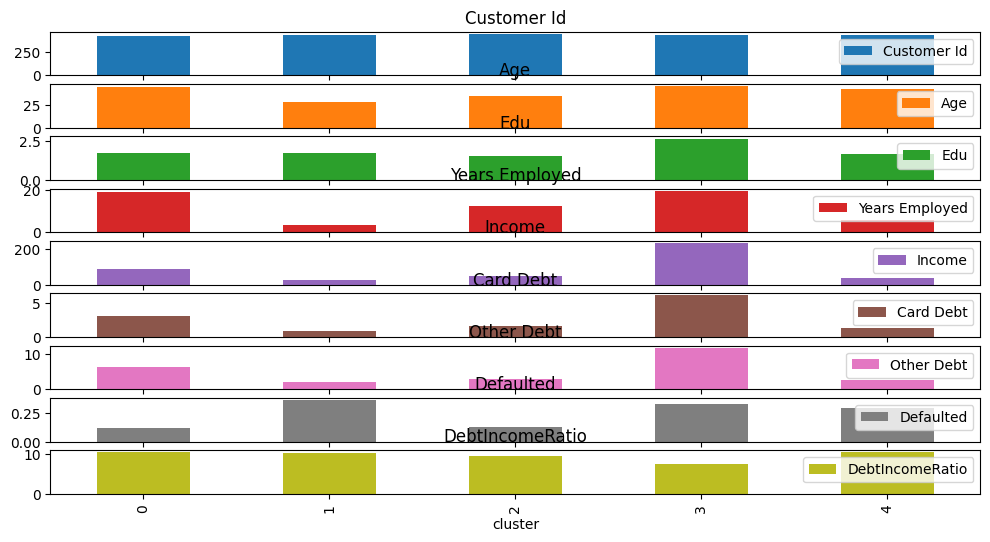

In [132]:
## Display the descriptive statistics for the column
cluster_means.plot(subplots=True, kind='bar', figsize=(12,6))

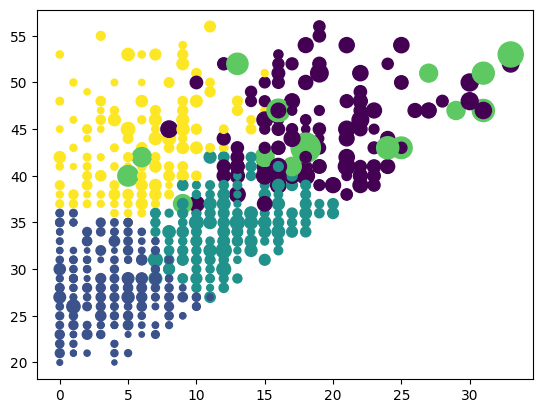

In [135]:

plt.scatter(X['Years Employed'], X['Age'], X['Income'], c=kmeans.labels_)

The data on the scatter plot shows that there is a relationship between, years employed, age, and income. Therefore, they should consider these factors when offering credit cards.